# Final Project

This final project will focus on pipeline incident data.

Specifically, this data presents details of pipeline incidents, as defined by the Onshore Pipeline Regulations and Processing Plant regulations, including cause information. The data ranges from 2008 to current; it is updated quarterly.

Our team will be focusing on a couple key areas within this dataset

1. Heatmap of incidents in Canada
2. Bar graph of the different types of incidents
3. Measurements of Substances Released as a Result of Pipeline Incidents
4. Map of sources of explosion / fire
5. Pipeline Incidents by Year

From our data and visualize the following questions

1. Where are pipeline incidents the most common?
2. What is the most common cause of an incident?
3. What kinds of substances are released?
4. How do these substances impact our environment?
5. Is there any reason there are more or less pipeline incidents every year?

Name: Connor Logan, Damian Young

Student ID: 190209360, 190346060

Link to our data set can be found here: https://open.canada.ca/data/en/dataset/7dffedc4-23fa-440c-a36d-adf5a6cc09f1

Imports

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from shapely.geometry import Point
import numpy as np
from datetime import datetime
from dateutil import parser

Viewing the Dataframe

In [87]:
#loading in the dataset
df = pd.read_csv('data/pipeline-incidents-comprehensive-data.csv', encoding='iso-8859-1')

#looking into the dataframe
pd.set_option('display.max_columns', None)
df.head()

,Incident Number,Incident Types,Reported Date,Nearest Populated Centre,Province,Company,Status,Latitude,Longitude,Approximate Volume Released (m3),Substance,Release Type,Significant,Year,Occurrence Date and Time,Discovered Date and Time,Detailed what happened,What happened category,Detailed why it happened,Why it happened category,Duration of interruption of pipeline operations,Pipeline or Facility Type,Activity being performed at time of incident,How the incident was discovered,Closed Date,Pipeline or facility equipment involved,Rupture,Incident type,Released substance type,Released volume (m3),Pipe body release,Residual effects on the environment,Source of Explosion,Source of Fire,Activity at time of fatality,Number of fatalities,Type of Injury,Number of individuals injured,Workdays lost,Work restricted by injury,Conditions that resulted in the operation beyond limits,Conditions that resulted in adverse effects on the environment,Number of people evacuated,Regulation,Pipeline Name,Pipeline outside diameter (NPS),Pipeline length (km),Substance carried,Facility Name,Facility Type,Facility latitude,Facility longitude,Country,Affects Company Property,Off Company Property,Affects Pipeline right-of-way,Affects off Pipeline right-of-way,Land Use,Population Density,Kilometre post,Emergency Level,Investigation Type,Was NEB Staff Deployed,Related NEB event number,Equipment or component involved,Design standard,Nominal pipe size,Material,Material grade,Schedule,Design wall thickness (mm),Custom design wall thickness (mm),Actual wall thickness (mm),Licensed maximum operating pressure (kPa),Restricted operating pressure (kPa),Actual operating pressure at time of failure (kPa),Designed depth of cover (m),Actual depth of cover (m),Year of manufacture,Year of installation,Year when put into service,Most recent cathodic protection reading at incident site (mV vs. Cu/CuSO4),Weld type,Seam type,Seam joining method,Seam clock position,Coating location,Coating type,Coating condition,Application method,Year when the coating was applied,Insulation installed,Repair type,Repair date,Equipment or component has never been inspected,Most recent inspection date for the failed equipment or component,Type of most recent inspection,Most recent inspection part of the routine inspection program,No maintenance done on this equipment or component,Date of the most recent maintenance work for the failed equipment or component,Most recent maintenance Type,Most recent maintenance work part of the routine maintenance program
0,INC2007-097,Release of Substance,01/02/2008,Grande Prairie,Alberta,Alliance Pipeline Ltd.,Closed,54.84000,-118.650000,Not Provided,Natural Gas - Sweet,Gas,No,2008,2007/12/27 02:00:00 PM Mountain,2007/12/27 02:00:00 PM Mountain,"Damage or deterioration mechanism, Cracking, C...",Corrosion and Cracking,"Job or system factors, Excessive wear and tear...",Maintenance,NaN,Transmission,Operation,NaN,2012/07/23,No,No,Release of Substance,Natural Gas - Sweet,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,OPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Yes,No,No,No,Unknown Land Use (Historical Data Migration),Unknown Population Density (Historical Data Mi...,NaN,Level I,Standard Review - 168 days,No,NaN,"Station/Facility, Compression, Pipe",NaN,NPS 3/4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Replacement,2007-12-27,No,NaN,NaN,No,No,2007-12-27,Replacement,No
1,INC2008-001,Release of Substance,01/02/2008,Cromer,Manitoba,Enbridge Pipelines Inc.,Closed,49.75300,-101.239000,8.0000,Crude Oil - Sweet,Liquid,No,2008,2008/01/02 11:30:00 AM Central,2008/01/02 11:30:00 AM Central,"Damage or deterioration mechanism, Material Lo...",Corrosion and Cracking,"Job or system factors, Inadequate maintenance,...",Maintenance,NaN,NaN,Operation,Employee / Contractor (Onsite),2011/01/11,Yes,No,Release of Substance,Crude Oil - Sweet,8.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,OPR,NaN,NaN,NaN,NaN,Cromer,NaN,NaN

Heatmap of incidents

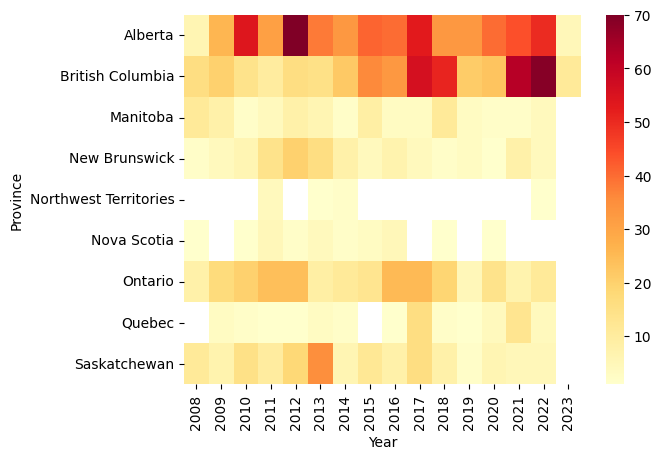

In [88]:
# Some fields are empty so we can safely drop them
df = df.dropna(subset=['Incident Number'])

#Create the pivot table
pivot_df = pd.pivot_table(df, index="Province", columns="Year", values="Incident Number", aggfunc='count')
sns.heatmap(pivot_df, cmap="YlOrRd")
plt.show()

Bar Graph of Different Types of Incidents

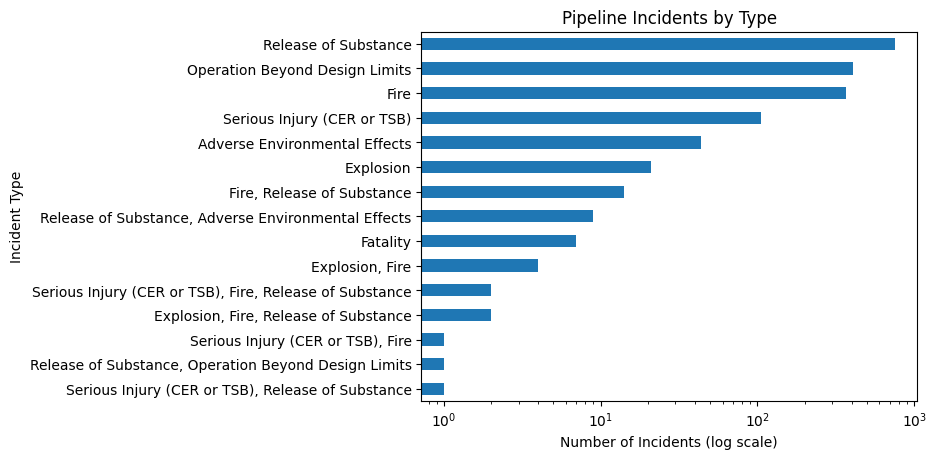

In [92]:
#Sort our data by the Incident Types
incident_counts = df['Incident Types'].value_counts().sort_values(ascending=True)

incident_counts.plot.barh()
# We will log scale this because of the amount of "Release of Substance" values there are. Values at the bottom of our graph are near 0
plt.xscale('log')
plt.title('Pipeline Incidents by Type')
plt.xlabel('Number of Incidents (log scale)')
plt.ylabel('Incident Type')
plt.show()

Measurements of Substances Released as a Result of Pipeline Incidents

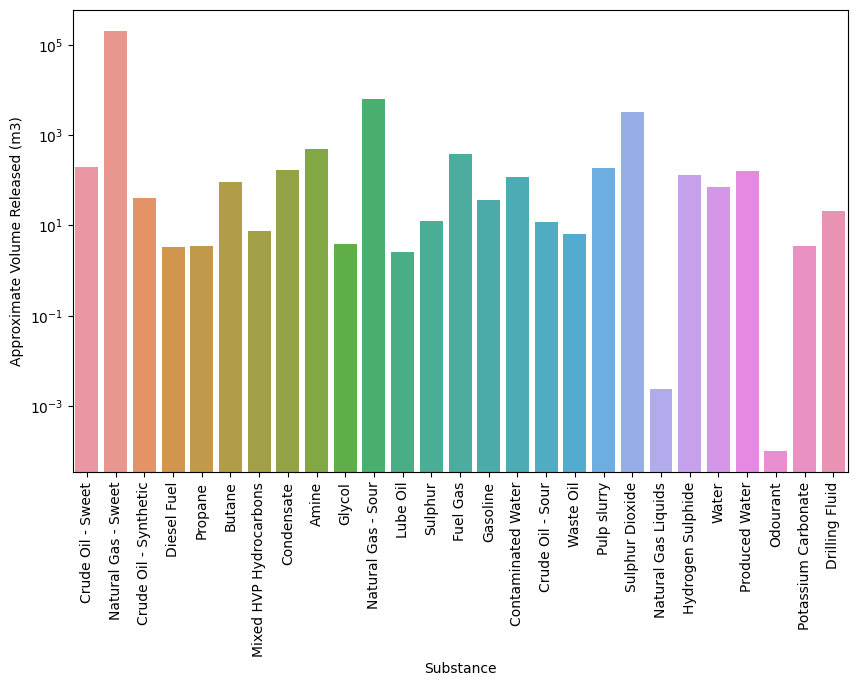

In [93]:
df['Approximate Volume Released (m3)'] = pd.to_numeric(df['Approximate Volume Released (m3)'], errors='coerce')

# Filter out null values

df = df.dropna(subset=['Approximate Volume Released (m3)'])

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="Substance", y="Approximate Volume Released (m3)", data=df, errorbar=None, estimator=np.mean, ax=ax)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

Map of Incidents

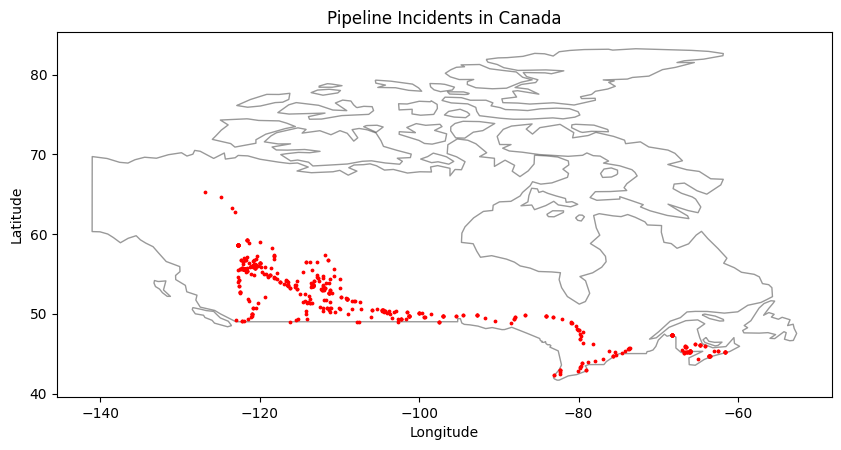

In [74]:
# Convert the longitude and latitude to a geopandas GeoDataFrame
geometry = gpd.points_from_xy(df.Longitude, df.Latitude)
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Create a basemap of Canada
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
canada = world[world.name == 'Canada']

# Plot the incidents on the basemap
fig, ax = plt.subplots(figsize=(10, 10))
canada.plot(ax=ax, alpha=0.4, color='white', edgecolor='black')
gdf.plot(ax=ax, markersize=3, color='red')

# Customize the plot
plt.title('Pipeline Incidents in Canada')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

Pipeline Incidents by Year

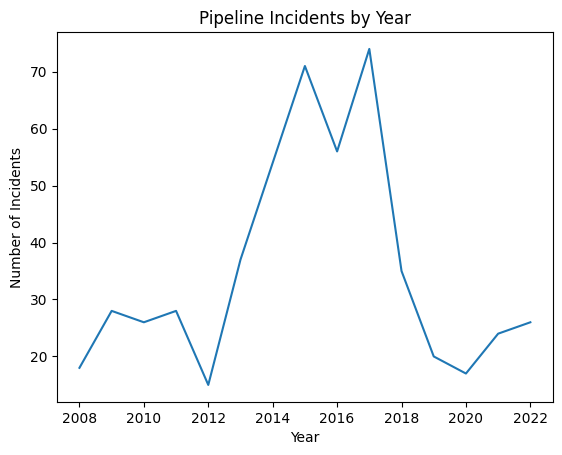

In [85]:
# Convert Reported Date column to datetime format
df['Reported Date'] = pd.to_datetime(df['Reported Date'])

# Group the data by year and count the number of incidents in each year
incidents_by_year = df.groupby(df['Reported Date'].dt.year)['Incident Number'].count()

# Plot the time series
plt.plot(incidents_by_year.index, incidents_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Pipeline Incidents by Year')
plt.show()

# Conclusion

From our Map of Canada we can clearly see that there are no areas more or less prone pipeline incidents, except for Alberta. This is a simple conclusion to draw from as that is where the majority of Canada's Oil Sands reside, along with the collection and main distribution of oil originate.

When measuring just how devastating these accidents are, we often look at what substance was released into the land, and into our atmosphere. From our graphs we can see the 3 most prevalent substances that are released were, "Natural Gas - Sweet", "Natural Gas - Sour", and "Sulfur Dioxide". Natural Gas is composed of methane, which has a significantly higher global warming potential than carbon dioxide. This is relatively concerning given the amount released from the pipeline incidents, along with how common these incidents are. Sulfur Dioxide is also commonly known to have negative impacts on the surrounding environment, adding sulfur to the air which can damage vegetation, and health impacts on the surrounding human population.

Opertion beyond design limits appears to be the most severe indicator of a pipeline incident. This is concerning, as it implies our current pipeline does not have the infrastructure to handle our needs for distribution. As such, a lot of maintenance, and upgrading, is required to continue to ensure the safe handling of these dangerous materials.